## Real estate data

Derek plans to start a new project, builting family homes. He has access tohistoric data for the region in which he had acquired land for the project. The historic data includes prices for the houses sold over a 10 year period.

The data includes informaiton about the number of bedrooms in each house which ranges from one to five rooms. 

Derek asked to analyze the data for any trends that might be evident. He wants to know the optimal amount of rooms to maximize profit for the project. 

## We will learn to 
* set up workspace
* get to know the data
* define sub-data sets
* detect outliers

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Import the CSV file with Pandas
data = pd.read_csv('raw_sales.csv', index_col = ['datesold'], parse_dates = ['datesold'])

# View the DataFrame
print(data.shape)
data.head()

(29580, 4)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


### Get to know the data: Find the distribution of the house prices over time and check missing values

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Housing Prices')

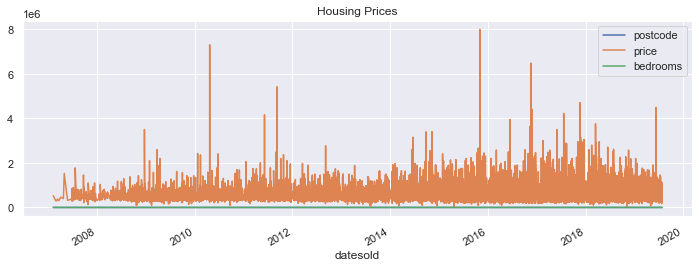

postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [4]:
# Plot the house priecs as a time series.
# Plot the size of the plot first. 
data.plot(figsize = (12, 4))

# Specify the legend and title of the plot. 
plt.legend(loc = 'best')
plt.title('Housing Prices')
plt.show(block = False);

# Check for missing values.
data.isna().sum()

**The data is way too dense to produce any valuable insights, we need to create subsets to derive any insights**

3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: bedrooms, dtype: int64


Text(0.5, 1.0, 'Count of number of bedrooms')

<AxesSubplot:title={'center':'Count of number of bedrooms'}, xlabel='bedrooms', ylabel='count'>

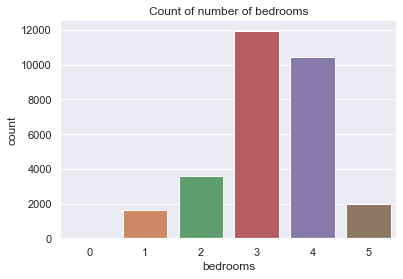

In [7]:
# Count the number of values in a specified column of the DataFrame
print(data['bedrooms'].value_counts())

# Create a plot.
plt.title('Count of number of bedrooms')

sns.despine(left = True);
sns.countplot(x = 'bedrooms', data = data)

In [10]:
print(data.groupby(by = 'propertyType').max('price'))
print(data.groupby(by = 'propertyType').min('price'))

              postcode    price  bedrooms
propertyType                             
house             2914  8000000         5
unit              2914  2500000         5
              postcode  price  bedrooms
propertyType                           
house             2600  56500         0
unit              2600  85000         0


In [12]:
print(data.groupby(by = 'bedrooms').max('price'))
print(data.groupby(by = 'bedrooms').min('price'))

          postcode    price
bedrooms                   
0             2914  1160000
1             2914  2280000
2             2914  3050000
3             2914  6480000
4             2914  8000000
5             2914  7300000
          postcode   price
bedrooms                  
0             2600   90000
1             2600   85000
2             2600   96000
3             2600   69000
4             2600   56500
5             2600  210000


**Define sub data sets**

Copy the original data and divide it into five data sets containing houses of one two three four and five bedrooms

In [14]:
# Create a copy
data_sub = data.copy()

# Data set consisting of houses with 1 bedroom
data_oneroom = data_sub[data_sub['bedrooms'] == 1]
print(data_oneroom.shape)

# Data set consisting of houses with 2 bedroom
data_tworoom = data_sub[data_sub['bedrooms'] == 2]
print(data_tworoom.shape)

# Data set consisting of houses with 3 bedroom
data_threeroom = data_sub[data_sub['bedrooms'] == 3]
print(data_threeroom.shape)

# Data set consisting of houses with 4 bedroom
data_fourroom = data_sub[data_sub['bedrooms'] == 4]
print(data_fourroom.shape)

# Data set consisting of houses with 5 bedroom
data_fiveroom = data_sub[data_sub['bedrooms'] == 5]
print(data_fiveroom.shape)

(1627, 4)
(3598, 4)
(11933, 4)
(10442, 4)
(1950, 4)


**Detect outliers**

We can now create a histogram for each of the sub-data sets by the number of bedrooms. Plot them all as subplots.
Remember that the index in this code refers to the position where the plot is rendered in a multi plot layout

(array([613., 982.,  27.,   2.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  85000.,  304500.,  524000.,  743500.,  963000., 1182500.,
        1402000., 1621500., 1841000., 2060500., 2280000.]),
 <BarContainer object of 10 artists>)

(array([1.526e+03, 1.846e+03, 1.950e+02, 2.300e+01, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  96000.,  391400.,  686800.,  982200., 1277600., 1573000.,
        1868400., 2163800., 2459200., 2754600., 3050000.]),
 <BarContainer object of 10 artists>)

(array([1.0209e+04, 1.6280e+03, 8.4000e+01, 8.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  69000.,  710100., 1351200., 1992300., 2633400., 3274500.,
        3915600., 4556700., 5197800., 5838900., 6480000.]),
 <BarContainer object of 10 artists>)

(array([8.528e+03, 1.767e+03, 1.260e+02, 1.600e+01, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  56500.,  850850., 1645200., 2439550., 3233900., 4028250.,
        4822600., 5616950., 6411300., 7205650., 8000000.]),
 <BarContainer object of 10 artists>)

(array([1.289e+03, 5.590e+02, 7.400e+01, 1.700e+01, 7.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 210000.,  919000., 1628000., 2337000., 3046000., 3755000.,
        4464000., 5173000., 5882000., 6591000., 7300000.]),
 <BarContainer object of 10 artists>)

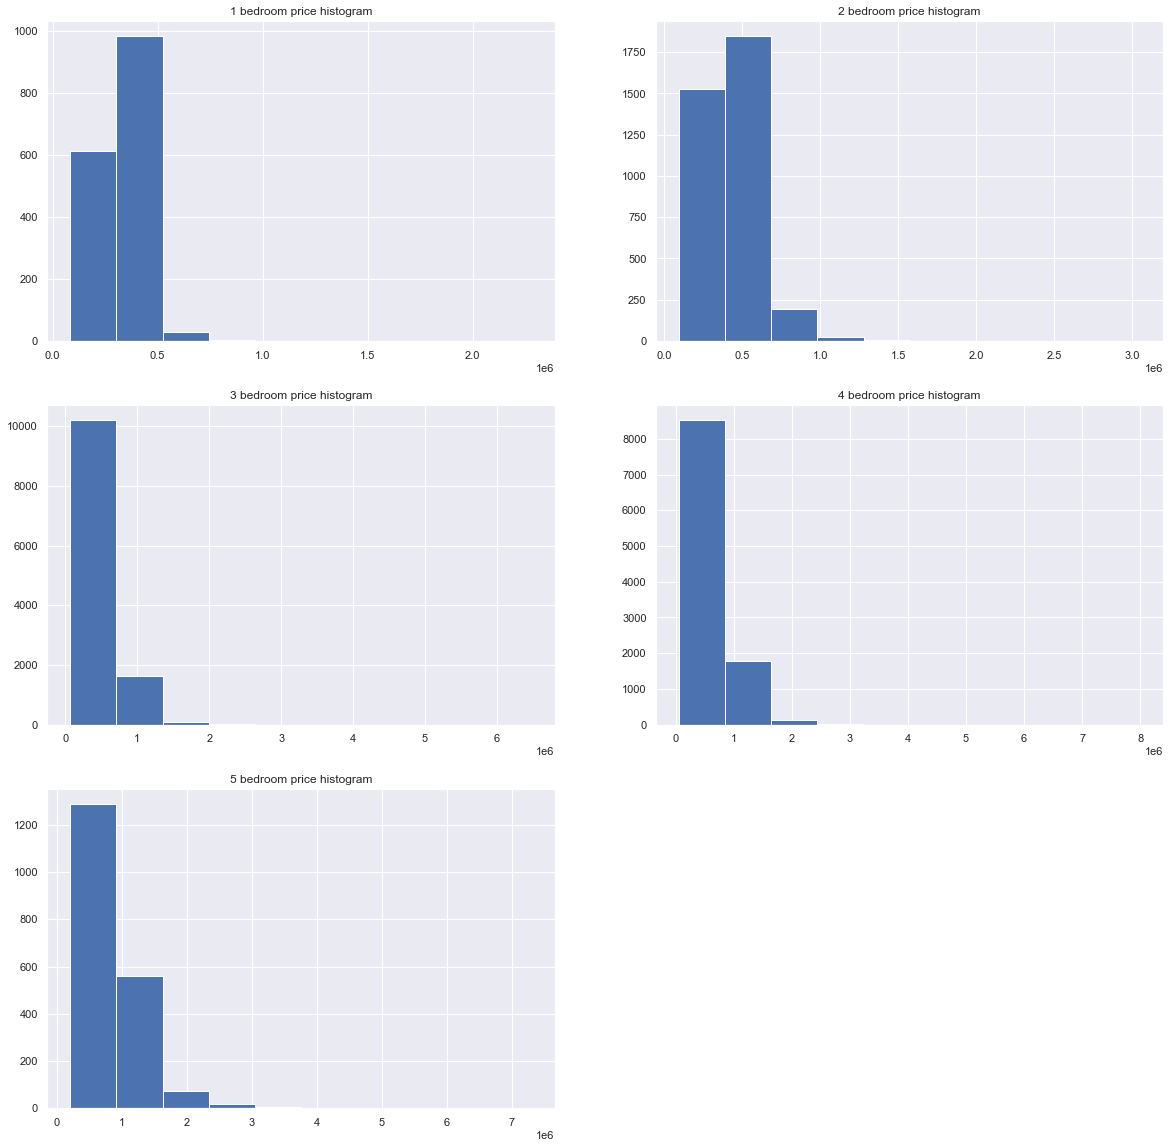

In [15]:
# Set the plot size.
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

# 1 bedroom:
axes[0][0].hist(data_oneroom['price'])
axes[0][0].title.set_text('1 bedroom price histogram')

# 1 bedroom:
axes[0][1].hist(data_tworoom['price'])
axes[0][1].title.set_text('2 bedroom price histogram')

# 1 bedroom:
axes[1][0].hist(data_threeroom['price'])
axes[1][0].title.set_text('3 bedroom price histogram')

# 1 bedroom:
axes[1][1].hist(data_fourroom['price'])
axes[1][1].title.set_text('4 bedroom price histogram')

# 1 bedroom:
axes[2][0].hist(data_fiveroom['price'])
axes[2][0].title.set_text('5 bedroom price histogram')

fig.delaxes(axes[2][1])

plt.show()

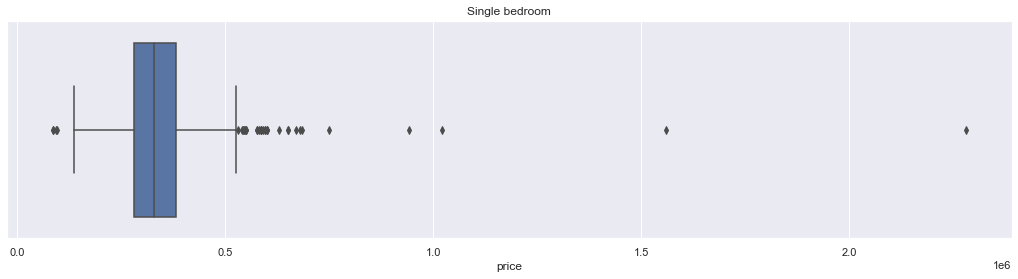

In [23]:
# Now create a boxplot for the one-bedroom house sub-data set by the number of bedrooms to find the outliers
# Set figsize
fig = plt.figure(figsize=(18, 4))

# Create a boxplot.
ax = sns.boxplot(x = data_oneroom['price'], whis = 1.5).set_title('Single bedroom')

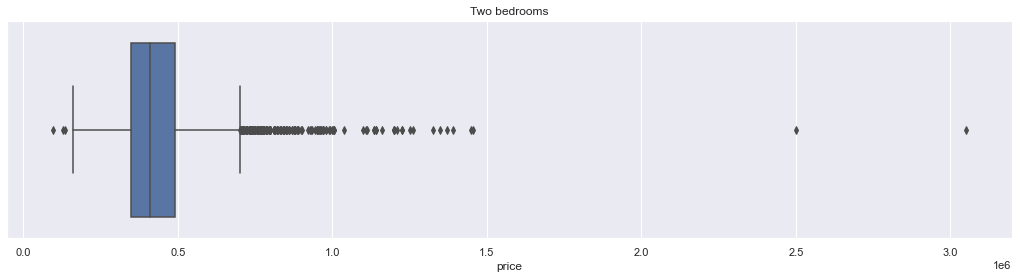

In [22]:
# now let'd do it for the other room houses as well 
fig = plt.figure(figsize=(18, 4))

# Create a boxplot.
ax = sns.boxplot(x = data_tworoom['price'], whis = 1.5).set_title('Two bedrooms')

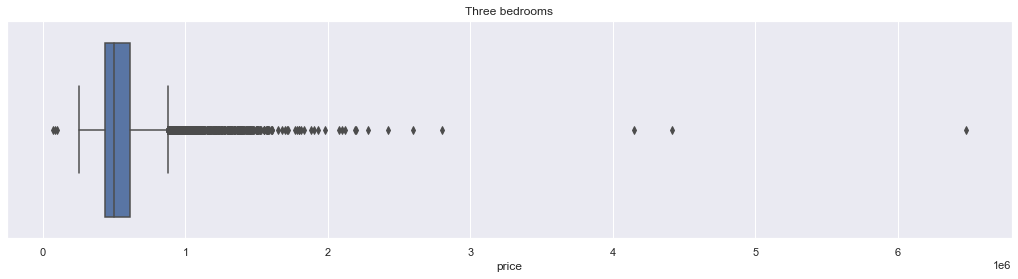

In [21]:
fig = plt.figure(figsize=(18, 4))

# Create a boxplot.
ax = sns.boxplot(x = data_threeroom['price'], whis = 1.5).set_title('Three bedrooms')

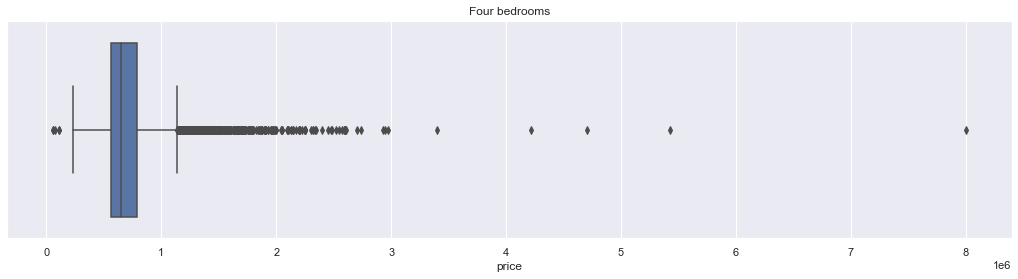

In [24]:
fig = plt.figure(figsize=(18, 4))

# Create a boxplot.
ax = sns.boxplot(x = data_fourroom['price'], whis = 1.5).set_title('Four bedrooms')

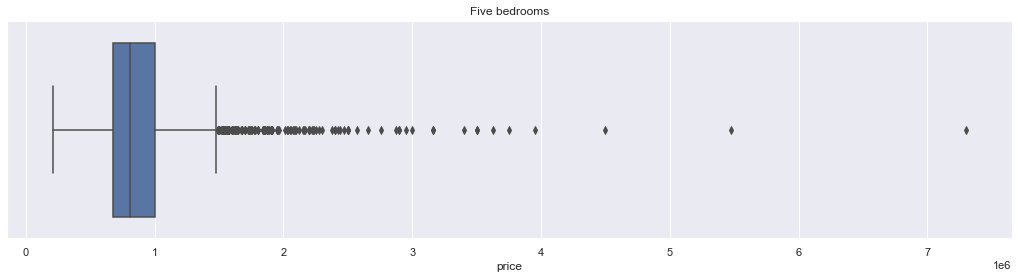

In [25]:
fig = plt.figure(figsize=(18, 4))

# Create a boxplot.
ax = sns.boxplot(x = data_fiveroom['price'], whis = 1.5).set_title('Five bedrooms')

**As we have a bunch of outliers, we should remove them to make better analysis**

In [27]:
# Determine the column where we have the ourlier
cols = ['price']

# Calculate the quantiles and IQR
Q1 = data_oneroom[cols].quantile(0.25)
Q3 = data_oneroom[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values
condition = ~((data_oneroom[cols] < (Q1 - 1.5 * IQR)) | (data_oneroom[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
data_oneroom_non_outlier = data_oneroom[condition]
data_oneroom_non_outlier

price    100250.0
dtype: float64

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-07-08,2600,327000,house,1
2007-10-15,2615,273000,house,1
2007-10-25,2602,135500,house,1
2007-11-29,2912,308000,house,1
2008-01-23,2601,380000,house,1
...,...,...,...,...
2019-07-19,2911,279000,unit,1
2019-07-23,2617,310000,unit,1
2019-07-25,2620,172500,unit,1


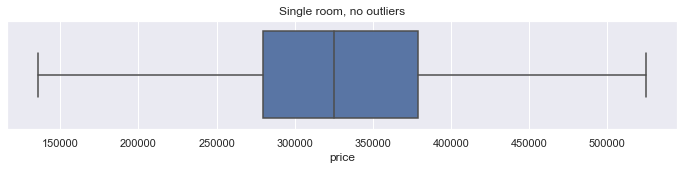

In [28]:
fig = plt.figure(figsize=(12, 2))

# Create a boxplot.
ax = sns.boxplot(x = data_oneroom_non_outlier['price'], whis = 1.5).set_title('Single room, no outliers')

In [31]:
# Repeat for the other subsets

# Determine the column where we have the ourlier
cols = ['price']

# Calculate the quantiles and IQR
Q1 = data_tworoom[cols].quantile(0.25)
Q3 = data_tworoom[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values
condition = ~((data_tworoom[cols] < (Q1 - 1.5 * IQR)) | (data_tworoom[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
data_tworoom_non_outlier = data_tworoom[condition]
data_tworoom_non_outlier

price    140000.0
dtype: float64

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-08-28,2906,325000,house,2
2007-08-30,2905,315000,house,2
2007-11-08,2602,497000,house,2
2007-11-12,2611,465000,house,2
2007-12-14,2602,259000,house,2
...,...,...,...,...
2019-07-25,2603,297500,unit,2
2019-07-25,2612,475000,unit,2
2019-07-25,2612,560000,unit,2


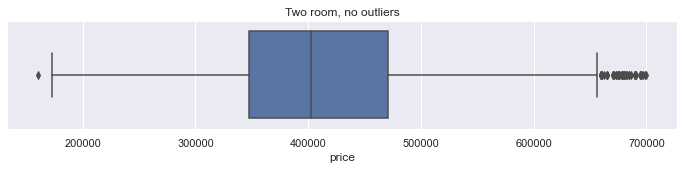

In [35]:
fig = plt.figure(figsize=(12, 2))

# Create a boxplot.
ax = sns.boxplot(x = data_tworoom_non_outlier['price'], whis = 1.5).set_title('Two room, no outliers')

In [36]:
# Repeat for the other subsets

# Determine the column where we have the ourlier
cols = ['price']

# Calculate the quantiles and IQR
Q1 = data_threeroom[cols].quantile(0.25)
Q3 = data_threeroom[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values
condition = ~((data_threeroom[cols] < (Q1 - 1.5 * IQR)) | (data_threeroom[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
data_threeroom_non_outlier = data_threeroom[condition]
data_threeroom_non_outlier

price    177500.0
dtype: float64

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-21,2906,310000,house,3
2007-04-24,2607,399000,house,3
2007-05-24,2902,359000,house,3
...,...,...,...,...
2019-07-04,2617,457500,unit,3
2019-07-18,2601,560000,unit,3
2019-07-23,2914,450000,unit,3


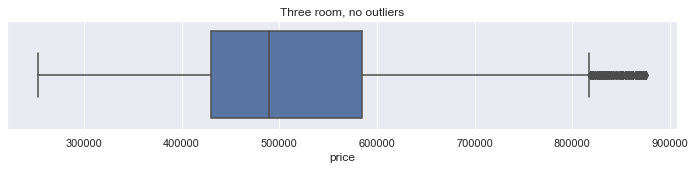

In [37]:
fig = plt.figure(figsize=(12, 2))

# Create a boxplot.
ax = sns.boxplot(x = data_threeroom_non_outlier['price'], whis = 1.5).set_title('Three room, no outliers')

In [38]:
# Repeat for the other subsets

# Determine the column where we have the ourlier
cols = ['price']

# Calculate the quantiles and IQR
Q1 = data_fourroom[cols].quantile(0.25)
Q3 = data_fourroom[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values
condition = ~((data_fourroom[cols] < (Q1 - 1.5 * IQR)) | (data_fourroom[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
data_fourroom_non_outlier = data_fourroom[condition]
data_fourroom_non_outlier

price    230500.0
dtype: float64

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-03-09,2905,380000,house,4
2007-04-04,2905,465000,house,4
2007-06-27,2612,850000,house,4
2007-06-28,2904,765000,house,4
...,...,...,...,...
2017-12-13,2612,680000,unit,4
2018-02-05,2905,535000,unit,4
2018-03-13,2905,645000,unit,4


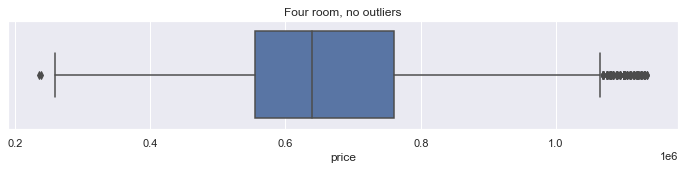

In [39]:
fig = plt.figure(figsize=(12, 2))

# Create a boxplot.
ax = sns.boxplot(x = data_fourroom_non_outlier['price'], whis = 1.5).set_title('Four room, no outliers')

In [40]:
# Repeat for the other subsets

# Determine the column where we have the ourlier
cols = ['price']

# Calculate the quantiles and IQR
Q1 = data_fiveroom[cols].quantile(0.25)
Q3 = data_fiveroom[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values
condition = ~((data_fiveroom[cols] < (Q1 - 1.5 * IQR)) | (data_fiveroom[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
data_fiveroom_non_outlier = data_fiveroom[condition]
data_fiveroom_non_outlier

price    325000.0
dtype: float64

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-07-02,2914,800000,house,5
2007-07-06,2615,535000,house,5
2007-08-07,2904,815000,house,5
2007-08-21,2902,418000,house,5
2007-09-21,2603,1460000,house,5
...,...,...,...,...
2019-07-19,2614,1150000,house,5
2019-07-23,2905,700000,house,5
2019-07-27,2905,865000,house,5


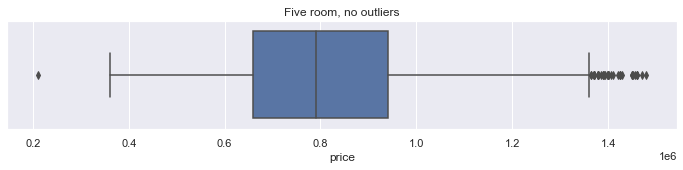

In [41]:
fig = plt.figure(figsize=(12, 2))

# Create a boxplot.
ax = sns.boxplot(x = data_fiveroom_non_outlier['price'], whis = 1.5).set_title('Five room, no outliers')